In [2]:
import numpy as np
import matplotlib.pyplot as plt

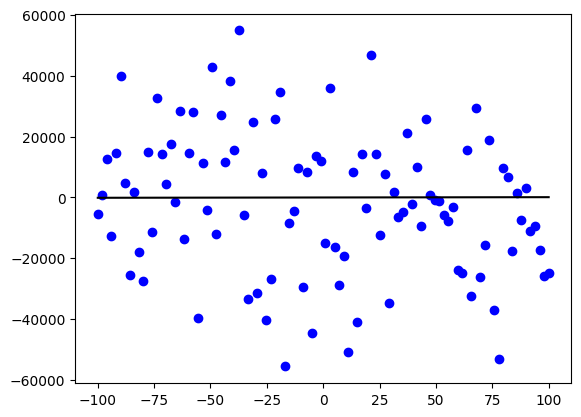

In [3]:
x = np.linspace(-100, 100, num = 100)
y = x + np.random.randn(100)*25000
y_pred = x
plt.plot(x, y, 'bo')
plt.plot(x, y_pred, 'k-')
plt.show()


In [4]:
def calculate_mse(y, y_pred):
    residuals = y_pred-y
    residuals_squared = np.square(residuals)
    msa = np.mean(residuals_squared)
    return msa

def calculate_rmse(y, y_pred):
    residuals = y_pred-y
    residuals_squared = np.square(residuals)
    msa = np.mean(residuals_squared)

    return np.sqrt(msa)

def calculate_mae(y, y_pred):
    residuals = y_pred-y
    return np.abs(residuals).mean()

def train_linear(x, y, slope):
    results = x * slope
    return results

msa = calculate_mse(y, y_pred)
print(msa)
print(calculate_mae(y, y_pred))

545763317.9582307
18799.66698964681


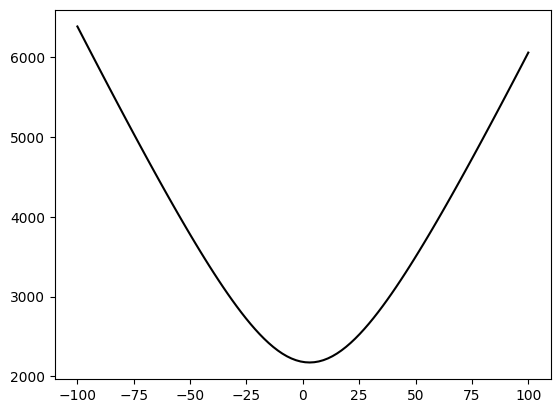

In [5]:
def calculate_cost_function(x):
    error_graph = []
    y = x + np.random.randn(len(x))*2500

    for point in x:
        y_pred = train_linear(x, y, slope=point)
        error_graph.append(calculate_rmse(y, y_pred))
    return np.array(error_graph)

error = calculate_cost_function(x)
plt.plot(x, error, 'k-')
plt.show()


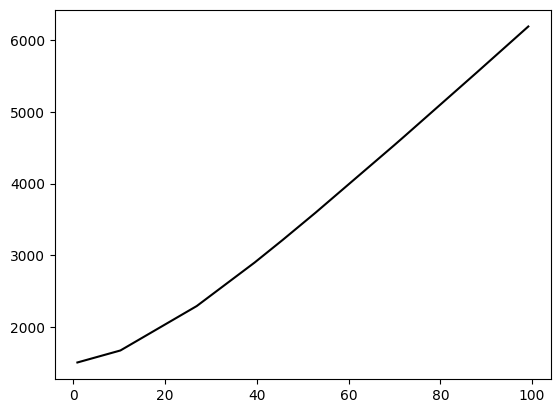

In [6]:
x_train = np.array([0.85, 10.23, 26.87, 39.5, 45.61, 52.82, 69.91, 72.2, 87.9, 99.17])
x_train_cost = calculate_cost_function(x_train)
plt.plot(x_train, x_train_cost, 'k-')
plt.show()

In [65]:
def gradient_descent(x, y, iterations = 1000, learning_rate = 0.0001,
                     stopping_threshold = 1e-7):

    # Initializing weight, bias, learning rate and iterations
    current_weight = 0.1
    current_bias = 0.01
    iterations = iterations
    learning_rate = learning_rate
    n = float(len(x))

    costs = []
    weights = []
    previous_cost = None

    # Estimation of optimal parameters
    for i in range(iterations):

        # Making predictions
        y_predicted = (current_weight * x) + current_bias

        # Calculating the current cost
        current_cost = calculate_mse(y, y_predicted)

        # If the change in cost is less than or equal to
        # stopping_threshold we stop the gradient descent
        if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
            break

        previous_cost = current_cost

        costs.append(current_cost)
        weights.append(current_weight)

        # Calculating the gradients
        weight_derivative = -(2/n) * sum(x * (y-y_predicted))
        bias_derivative = -(2/n) * sum(y-y_predicted)

        # Updating weights and bias
        current_weight = current_weight - (learning_rate * weight_derivative)
        current_bias = current_bias - (learning_rate * bias_derivative)

        # Printing the parameters for each 1000th iteration
        if i % 100 == 0:
            print(f"Iteration {i+1}: Cost {current_cost}, Weight \
            {current_weight}, Bias {current_bias}")


    # Visualizing the weights and cost at for all iterations
    plt.figure(figsize = (8,6))
    plt.plot(weights, costs)
    plt.scatter(weights, costs, marker='o', color='red')
    plt.title("Cost vs Weights")
    plt.ylabel("Cost")
    plt.xlabel("Weight")
    plt.show()

    return current_weight, current_bias

Iteration 1: Cost 21929.128039916865, Weight             1.7096186572082614, Bias 0.03907569175985047
Iteration 101: Cost 3157.6892474119954, Weight             2.419304365116585, Bias 0.6235064218932467
Iteration 201: Cost 3125.0885871459377, Weight             2.4110340448433147, Bias 1.1943921673183733
Iteration 301: Cost 3092.8439962438592, Weight             2.4028090134197004, Bias 1.7621517026523974
Iteration 401: Cost 3060.9515856620756, Weight             2.394629022840847, Bias 2.326802147239445
Iteration 501: Cost 3029.4075088336263, Weight             2.386493826459953, Bias 2.888360526676925
Iteration 601: Cost 2998.2079612043394, Weight             2.378403178980872, Bias 3.4468437733288866
Iteration 701: Cost 2967.3491797739634, Weight             2.370356836450715, Bias 4.00226872683658
Iteration 801: Cost 2936.8274426423054, Weight             2.362354556252497, Bias 4.554652134626202
Iteration 901: Cost 2906.639068560332, Weight             2.3543960970978204, Bias 5.

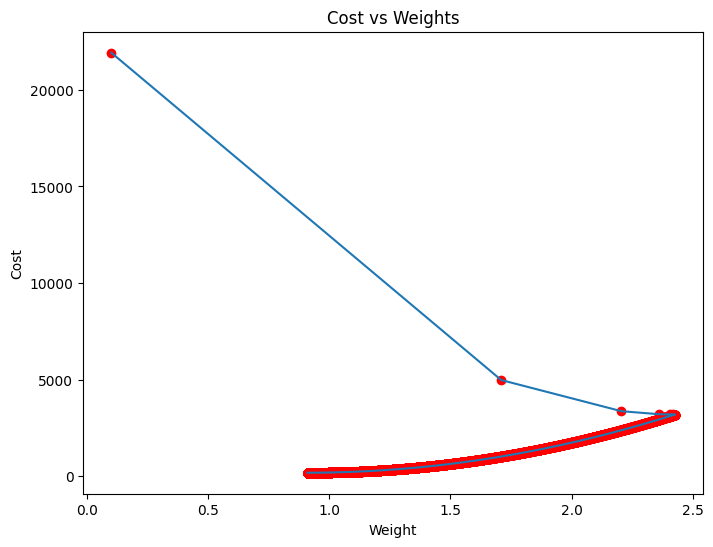

Estimated Weight: 0.9098728063913231
Estimated Bias: 104.81692724456529


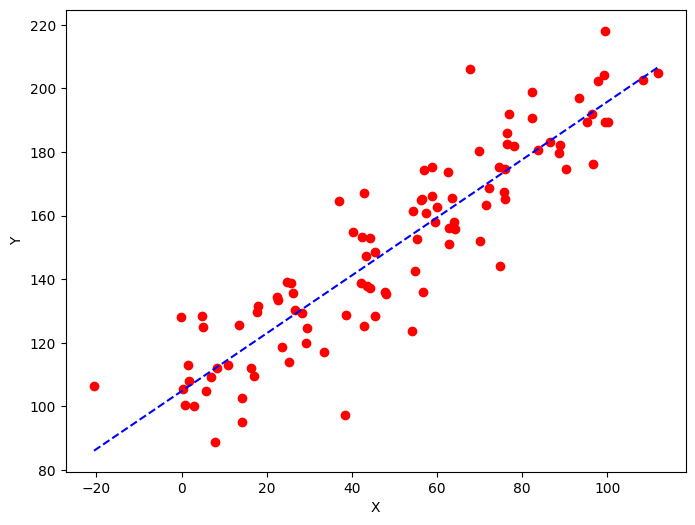

In [66]:
X = np.linspace(0, 100, 100) + np.random.randn(100)*10
Y = np.linspace(100, 200, 100) + np.random.randn(100)*10


# Estimating weight and bias using gradient descent
estimated_weight, estimated_bias = gradient_descent(X, Y, iterations=200000)
print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {estimated_bias}")

# Making predictions using estimated parameters
Y_pred = estimated_weight*X + estimated_bias

# Plotting the regression line
plt.figure(figsize = (8,6))
plt.scatter(X, Y, marker='o', color='red')
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
